In [13]:
%matplotlib inline

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src.visualization import visualize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [14]:
from pvlib.iotools import read_epw
weather, meta = read_epw('../data/processed/meteo.epw')
weather.head()


,year,month,day,hour,minute,data_source_unct,temp_air,temp_dew,relative_humidity,atmospheric_pressure,...,ceiling_height,present_weather_observation,present_weather_codes,precipitable_water,aerosol_optical_depth,snow_depth,days_since_last_snowfall,albedo,liquid_precipitation_depth,liquid_precipitation_quantity
2005-01-01 00:00:00+01:00,2005,1,1,1,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,7.1,1.5,68,98414,...,77777,9,999999999,10,0.118,18,0,0.732,0.0,99.0
2005-01-01 01:00:00+01:00,2005,1,1,2,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,6.7,1.5,69,98414,...,77777,9,999999999,10,0.118,18,0,0.717,0.0,99.0
2005-01-01 02:00:00+01:00,2005,1,1,3,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,6.4,1.0,68,98414,...,77777,9,999999999,10,0.118,18,0,0.702,0.0,99.0
2005-01-01 03:00:00+01:00,2005,1,1,4,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,6.2,0.8,68,98414,...,77777,9,999999999,10,0.118,18,0,0.689,0.0,99.0
2005-01-01 04:00:00+01:00,2005,1,1,5,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,6.0,0.5,68,98414,...,77777,9,999999999,10,0.118,18,0,0.676,0.0,99.0


In [15]:
import pandas as pd

energy_balance = pd.read_csv('../data/processed/energy.csv')
energy_balance.head()

,TIME,REL_BAL_ENERGY,1_B4_QBAL,1_B4_DQAIRdT,1_B4_QHEAT,1_B4_QCOOL,1_B4_QINF,1_B4_QVENT,1B4_QCOUP,1_B4_QTRANS,...,3_B4_QHEAT,3_B4_QCOOL,3_B4_QINF,3_B4_QVENT,3B4_QCOUP,3_B4_QTRANS,3_B4_QGINT,3_B4_QWGAIN,3_B4_QSOL,3_B4_QSOLAIR
0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0
1,1.0,0.0,-5.955000e-12,-450.0,6107.0,0.0,-762.0,-3805.0,0.0,-1992.0,...,3169.00,0.0,-350.5,-1750.0,0.0,-1283.00,8.208,0.0,0.0,0.0
2,2.0,0.0,-4.046000e-12,0.0,2179.0,0.0,-802.6,-1836.0,0.0,457.3,...,46.27,0.0,-369.2,-844.4,0.0,1159.00,8.208,0.0,0.0,0.0
3,3.0,0.0,-2.748000e-11,0.0,4746.0,0.0,-669.0,-1732.0,0.0,-2347.0,...,1135.00,0.0,-307.7,-796.8,0.0,-38.48,8.208,0.0,0.0,0.0
4,4.0,0.0,-3.561000e-11,0.0,4851.0,0.0,-688.5,-1791.0,0.0,-2373.0,...,1210.00,0.0,-316.7,-824.0,0.0,-77.43,8.208,0.0,0.0,0.0


In [16]:
cultural_e = pd.read_csv('../data/processed/cultural-e.csv')
cultural_e.head()

,TIME,QHEAT_1,QCOOL_1
0,0.0,0.000000,0.0
1,1.0,7254.582961,0.0
2,2.0,4562.878582,0.0
3,3.0,7945.597233,0.0
4,4.0,8090.225423,0.0


# Graphs

In [17]:
from src.visualization import visualize as viz

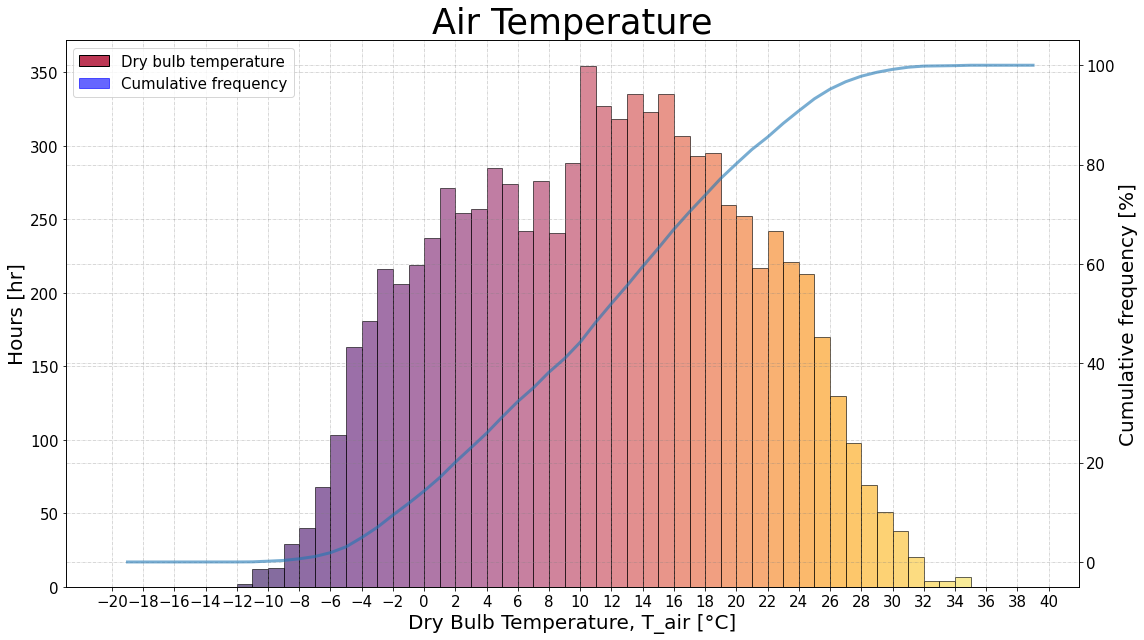

In [18]:
viz.air_temperature(weather)

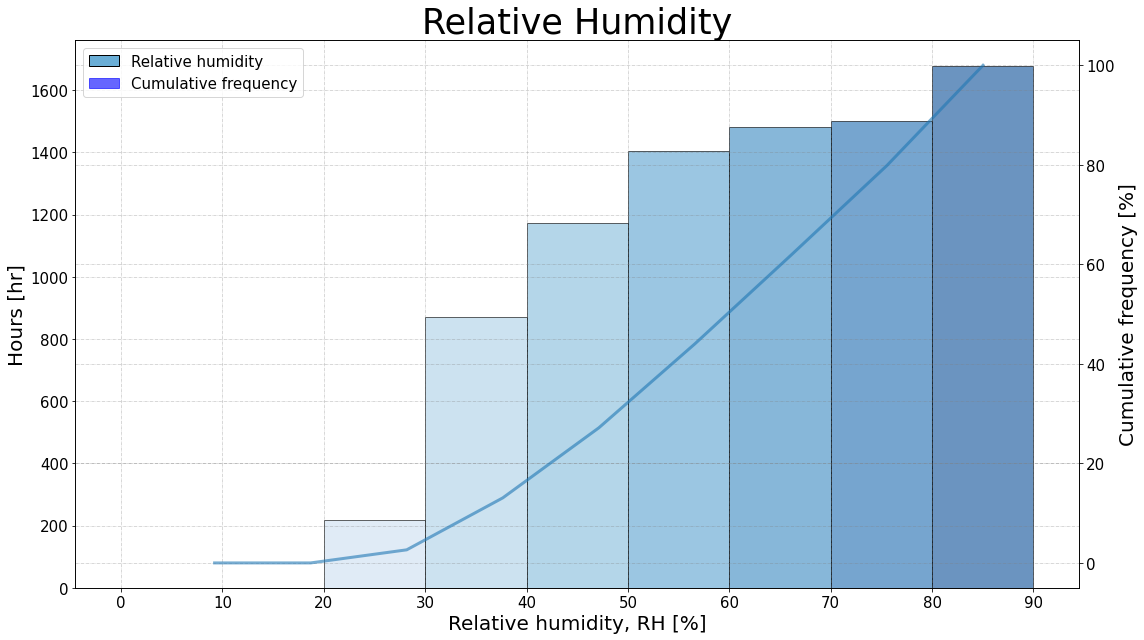

In [19]:
viz.relative_humidity(weather)

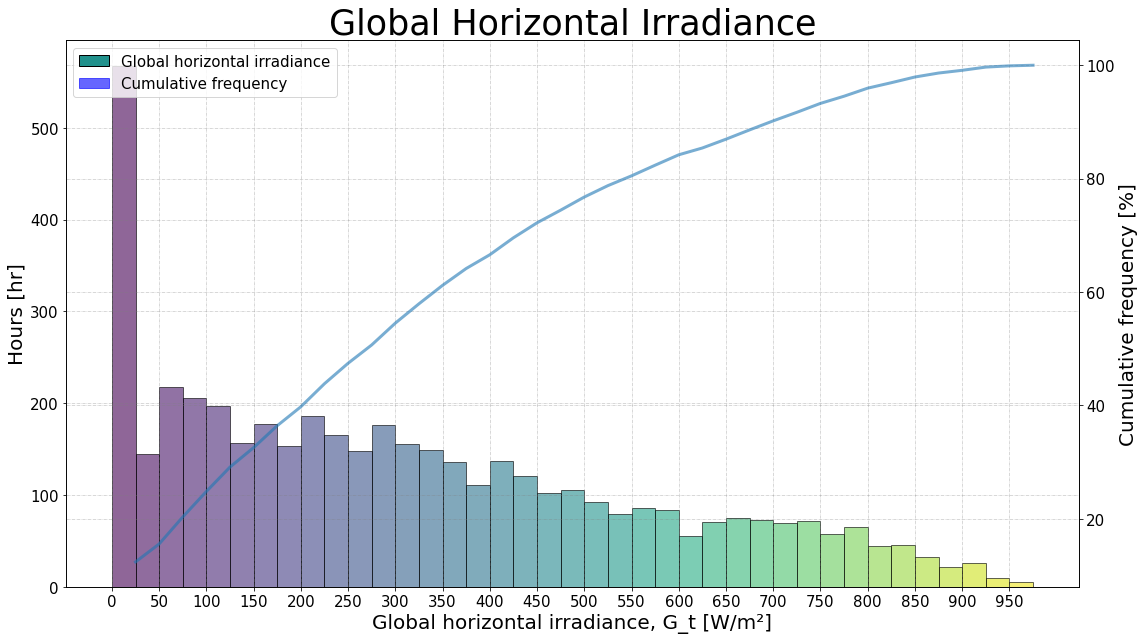

In [20]:
viz.horizontal_irradiance(weather)

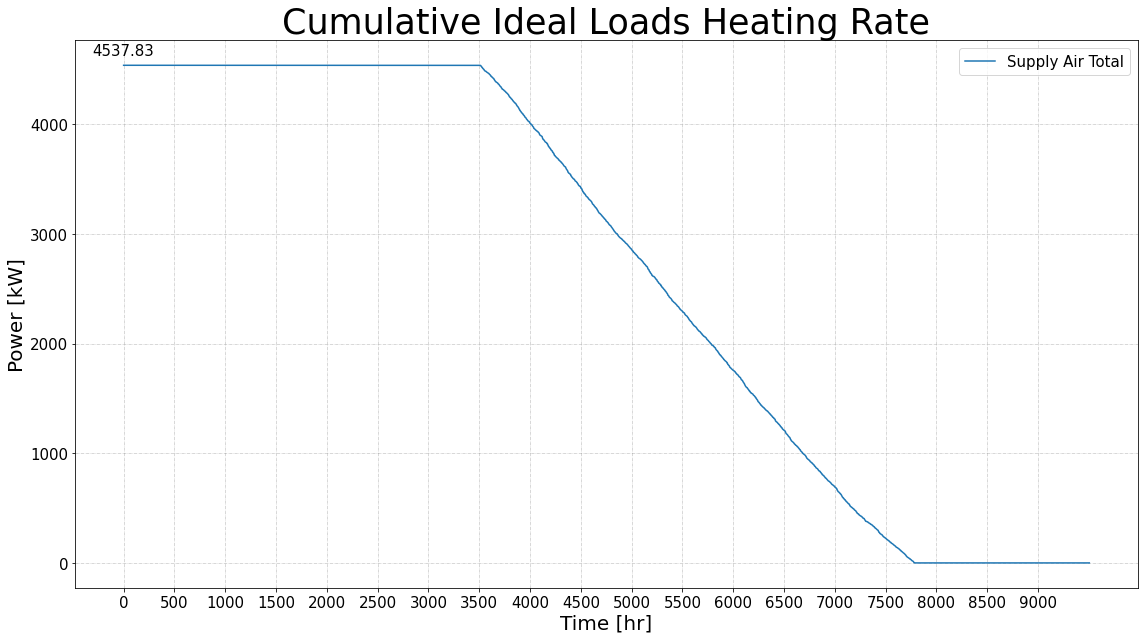

In [21]:
viz.heating_loads(cultural_e)

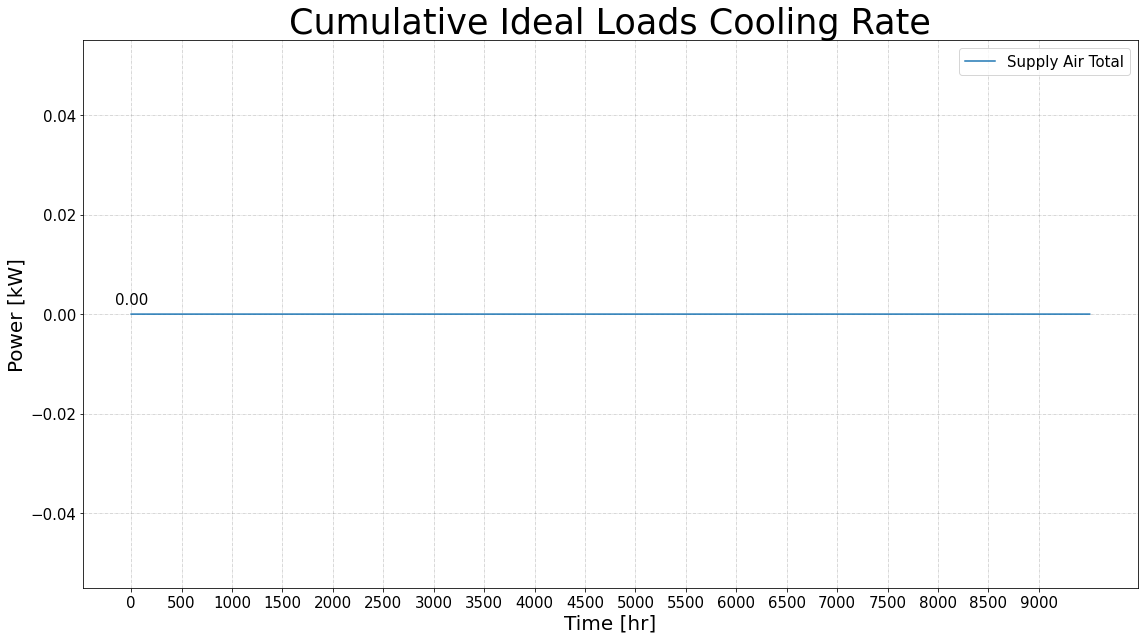

In [22]:
viz.cooling_loads(cultural_e)

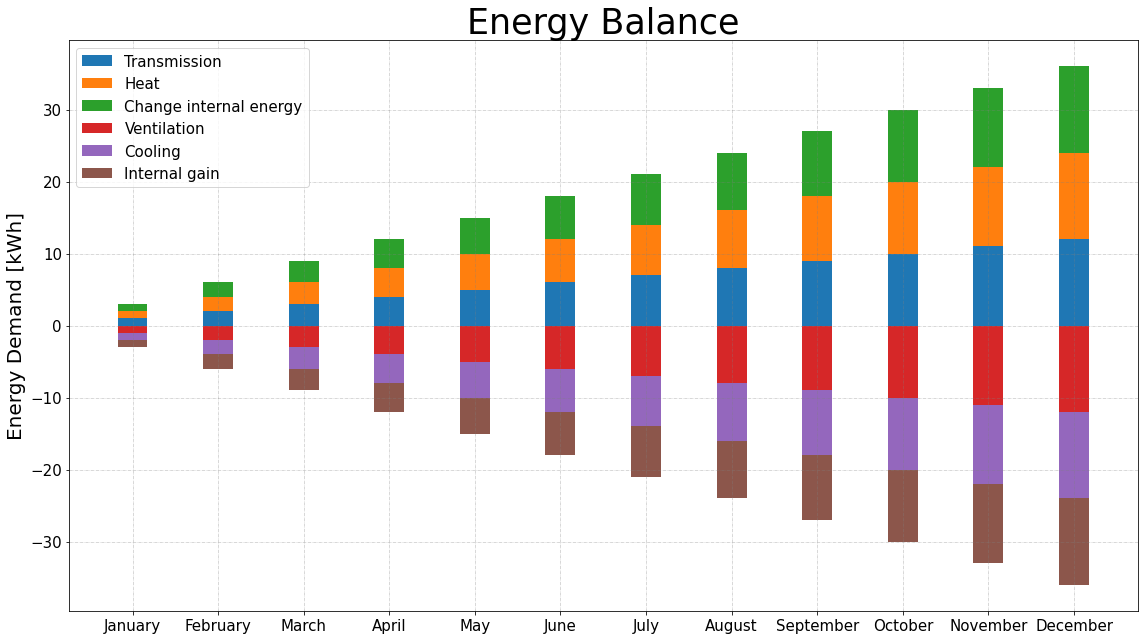

In [39]:
viz.zone_energy_balance()

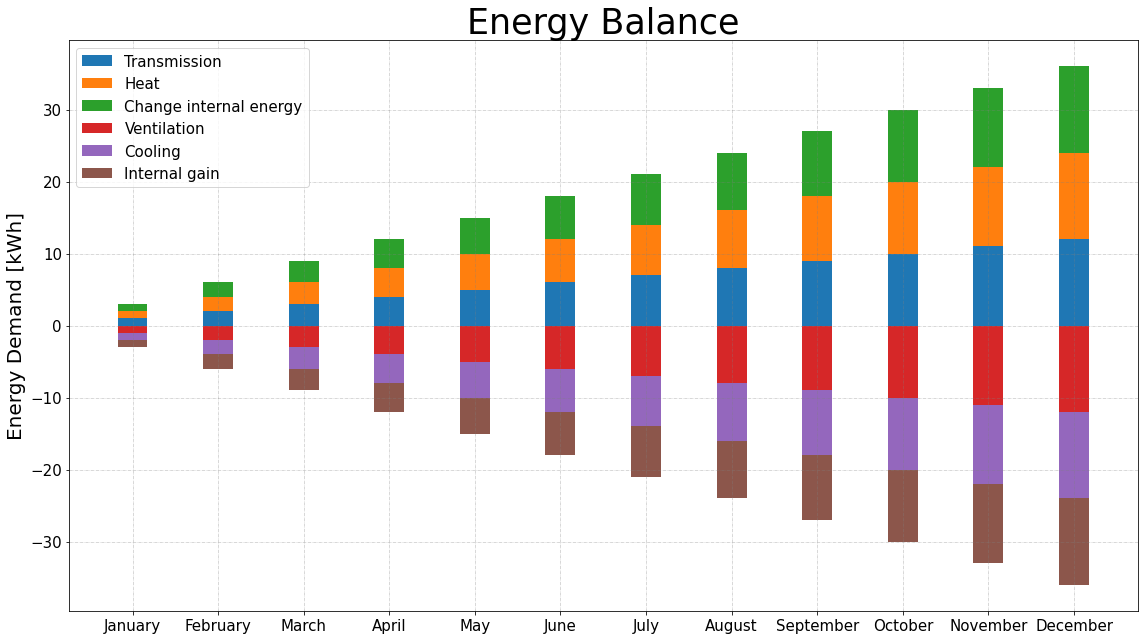

In [38]:
viz.energy_balance()

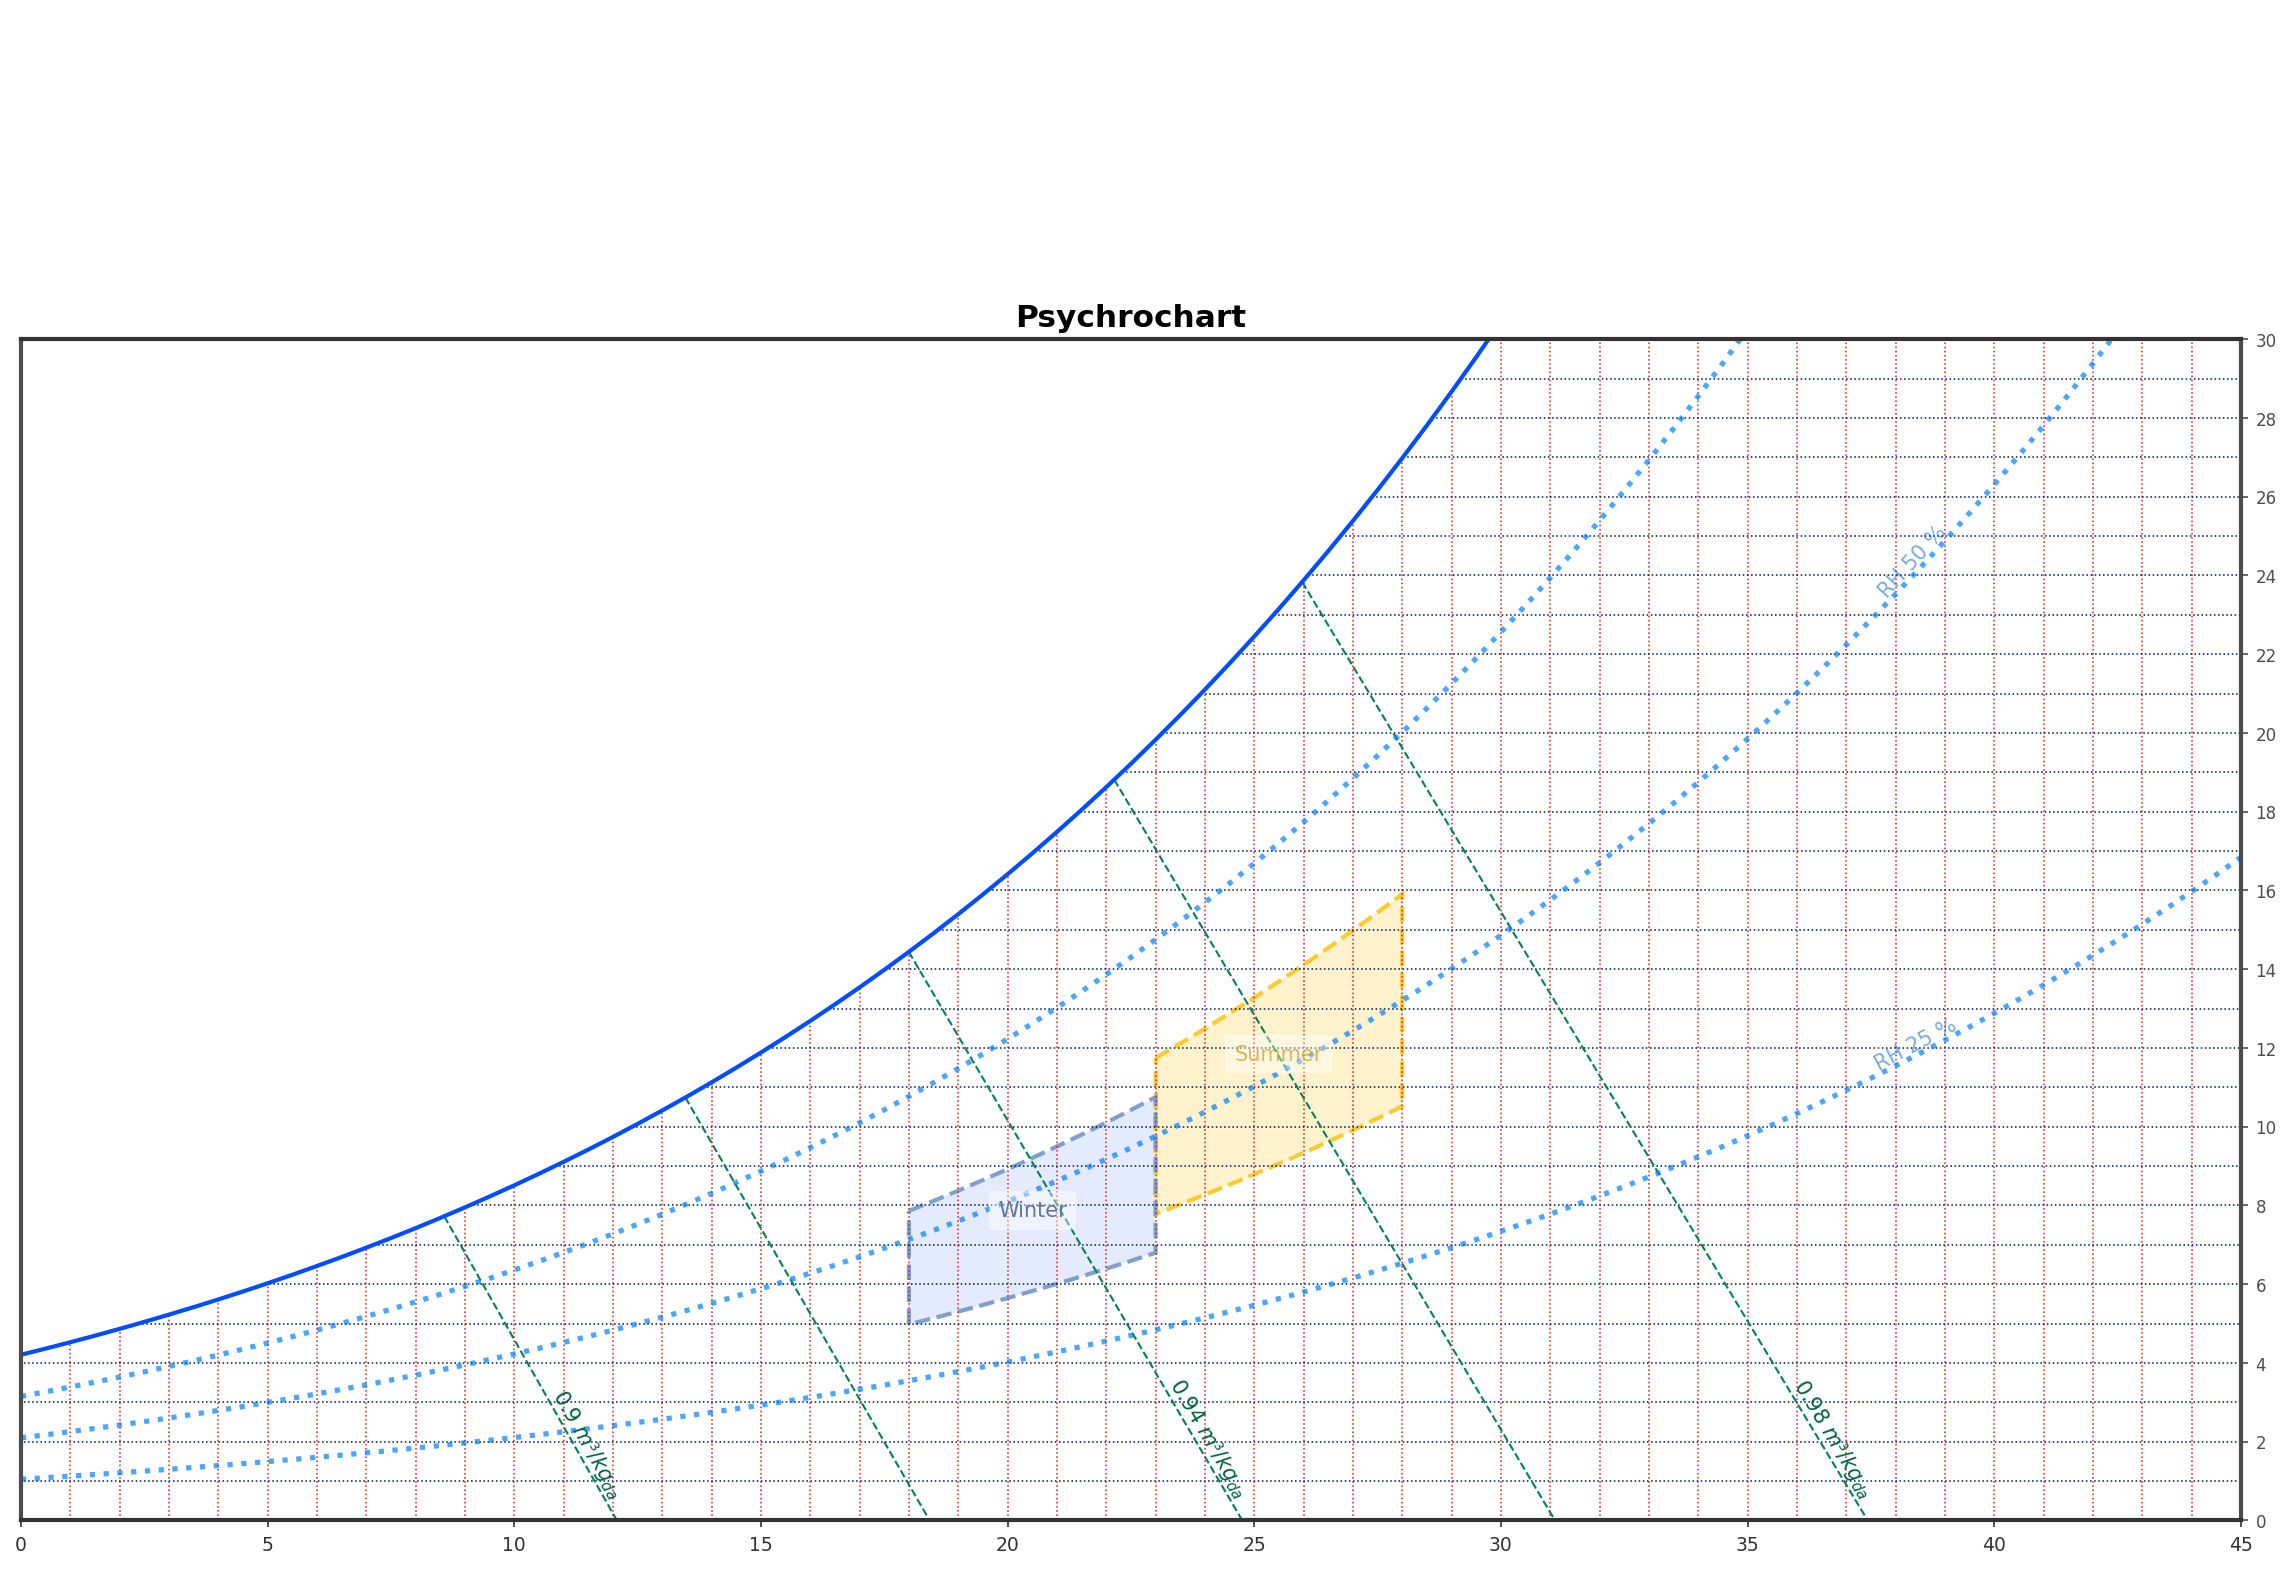

In [24]:
viz.psychrochart().get_figure()